<a href="https://colab.research.google.com/github/abdulloshoh/DataScience_mohirdev/blob/master/Tashkent_houses_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
df['district'].value_counts()


Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()


,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
x = housing['size'].to_numpy()
x

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


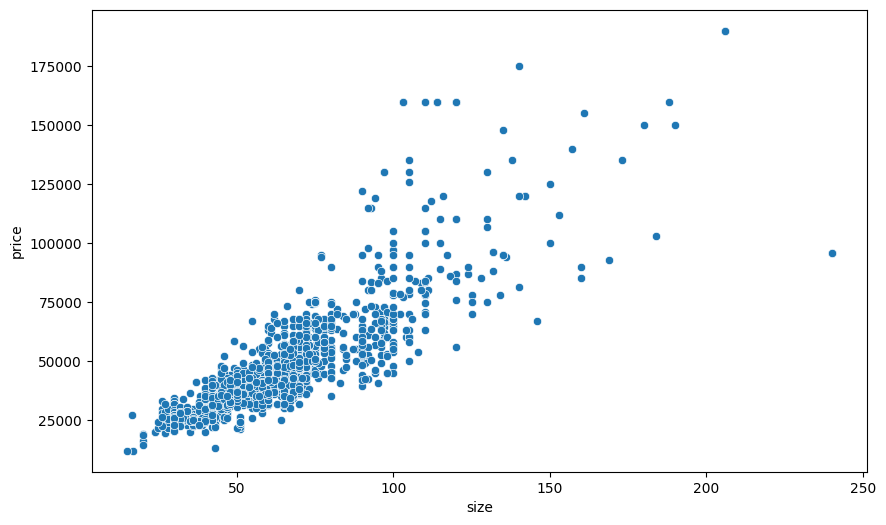

In [ ]:
plt.figure(figsize=(10,6))
sb.scatterplot(data = housing, x='size' , y='price')
plt.show()

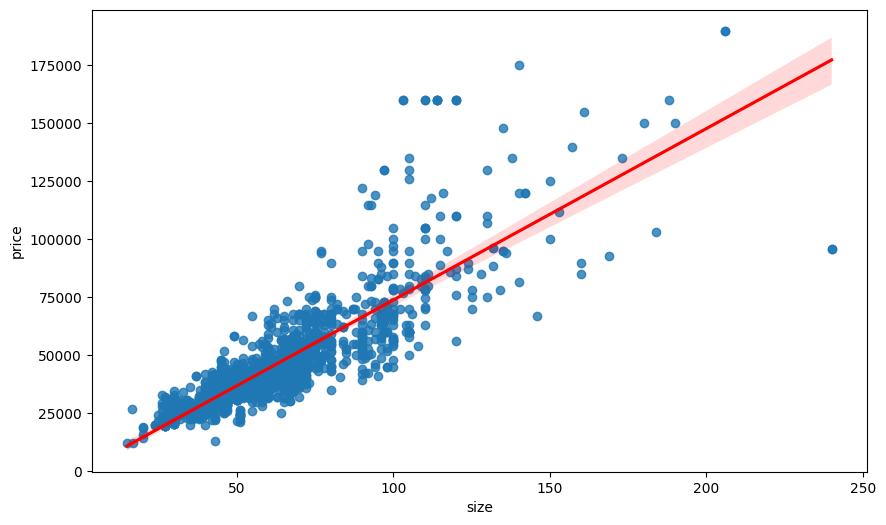

In [ ]:
plt.figure(figsize=(10,6))
sb.regplot(data = housing, x='size' , y='price', line_kws={'color':'red'})
plt.show()

In [ ]:
import numpy as np

xmean = x.mean()
ymean = y.mean()

In [ ]:
teta1 = sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
print(f"{teta1=}")


teta1=740.0264822713287


In [ ]:
teta0 = ymean-teta1*xmean
print(f'{teta0=}')

teta0=-195.94911352690542


In [ ]:
x_test = housing.sample(10,random_state=42)['size'].to_numpy()
print(f' {x_test= }')
y_test  = housing.sample(10,random_state=42)['price'].to_numpy()
print(f'{y_test=}')

 x_test= array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [ ]:
y_predict = teta0 + teta1 * x_test
print(f"{y_predict = }")

y_predict = array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [ ]:
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4140.35031634715


In [ ]:
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173715


# Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)


In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


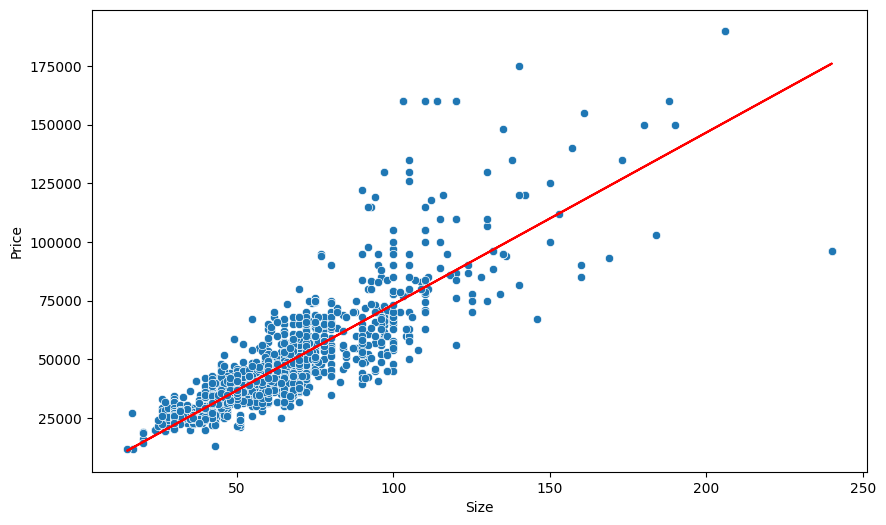

In [ ]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()




In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR_model.predict(x_test)

y_predict

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666


In [ ]:
pd.DataFrame(y_predict).head()

,0
0,39676.352309
1,30883.011448
2,26486.341017
3,44073.022740
4,35279.681878


In [ ]:
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
